In [ ]:
%matplotlib notebook

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
games_df = pd.read_csv("Games_df.csv")

In [3]:
games_df.dtypes

Unnamed: 0                      int64
Game Title                     object
Game Category                  object
Game Score                    float64
Number of Reviews               int64
Price                         float64
Number of Installs              int64
Developer                      object
Play Store URL                 object
Total Download Revenue ($)    float64
dtype: object

In [4]:
games_df

,Unnamed: 0,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
0,0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387771,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
1,1,Five Nights at Freddy's,GAME_ACTION,4.6,103822,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,2990000.0
2,2,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17359,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
3,3,Hitman Sniper,GAME_ACTION,4.6,591984,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
4,4,Assassin's Creed Identity,GAME_ACTION,3.8,50011,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...,995000.0
5,5,Grand Theft Auto III,GAME_ACTION,4.0,96668,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
6,6,Five Nights at Freddy's 4,GAME_ACTION,4.6,21573,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
7,7,Call of Duty:Black Ops Zombies,GAME_ACTION,4.2,14005,6.99,100000,"Activision Publishing, Inc.",https://play.google.com/store/apps/details?id=...,699000.0
8,8,Space Marshals,GAME_ACTION,4.8,7914,0.99,50000,Pixelbite,https://play.google.com/store/apps/details?id=...,49500.0
9,9,truTV Impractical Jokers Wheel of Doom,GAME_ACTION,4.3,165,2.99,5000,truTVnetwork,https://play.google.com/store/apps/details?id=...,14950.0


In [5]:
games_df = games_df.rename(columns={"Total Download Revenue ($)":"Revenue","Number of Installs":"Installs"})

In [20]:
#sorting all 425 results by total revenue.
top_games = games_df.sort_values(by='Revenue', ascending=False)

In [21]:
new_df = top_games.iloc[2:]

In [22]:
new_df

,Unnamed: 0,Game Title,Game Category,Game Score,Number of Reviews,Price,Installs,Developer,Play Store URL,Revenue
0,0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387771,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.00
65,65,Worms 3,GAME_ARCADE,4.2,67903,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.00
5,5,Grand Theft Auto III,GAME_ACTION,4.0,96668,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
26,26,Terraria.,GAME_ADVENTURE,4.3,231388,4.99,1000000,505 Games Srl,https://play.google.com/store/apps/details?id=...,4990000.00
253,253,Need for Speed Most Wanted,GAME_RACING,3.9,44742,4.99,1000000,ELECTRONIC ARTS,https://play.google.com/store/apps/details?id=...,4990000.00
53,53,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,132107,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
305,305,Goat Simulator,GAME_SIMULATION,4.3,100977,4.99,1000000,Coffee Stain Publishing,https://play.google.com/store/apps/details?id=...,4990000.00
61,61,SuperRetro16 ( SNES Emulator ),GAME_ARCADE,4.3,38562,3.99,1000000,Neutron Emulation,https://play.google.com/store/apps/details?id=...,3990000.00
234,234,Monument Valley,GAME_PUZZLE,4.8,208428,3.99,1000000,ustwo games,https://play.google.com/store/apps/details?id=...,3990000.00
375,375,Trivia Crack (No Ads),GAME_TRIVIA,4.5,61199,5.99,500000,Etermax,https://play.google.com/store/apps/details?id=...,2995000.00


In [ ]:
#extract top 25 games according to their revenue from df
top_games = top_games['Revenue'].nlargest(25).to_frame()
top_games = games_df.loc[top_games.index]

In [ ]:
#show top_games data through a bar chart/ version 1
tick_location = np.arange(len(top_games))
rev1 = plt.bar(tick_location,top_games["Revenue"], align="center", color="tab:blue",label="revenue")
rev2 = plt.bar(tick_location,top_games["Installs"], align="center",color="orange",label="total download")
plt.xticks(tick_location,top_games["Game Title"], rotation=90)
plt.xticks()

plt.xlim(-1, len(top_games))
plt.title("Revenues Generated from Top 25 Paid Games")
plt.ylim(0,max(top_games["Revenue"]+5000000))
plt.ylabel("Total Download Revenue (10 million)")

plt.tight_layout()
plt.legend()
plt.savefig("top_paid_games.png")

In [ ]:
#showing the data with a scatter plot

arcade = top_games.loc[top_games["Game Category"]=="GAME_ARCADE"]
sports = top_games.loc[top_games["Game Category"]=="GAME_SPORTS"]
racing = top_games.loc[top_games["Game Category"]=="GAME_RACING"]
music = top_games.loc[top_games["Game Category"]=="GAME_MUSIC"]
educational = top_games.loc[top_games["Game Category"]== "GAME_EDUCATIONAL"]
board = top_games.loc[top_games["Game Category"]=="GAME_BOARD"]
casino = top_games.loc[top_games["Game Category"]=="GAME_CASINO"]
action = top_games.loc[top_games["Game Category"]=="GAME_ACTION"]
trivia = top_games.loc[top_games["Game Category"]=="GAME_TRIVIA"]
simulation = top_games.loc[top_games["Game Category"]=="GAME_SIMULATION"]
adventure = top_games.loc[top_games["Game Category"]=="GAME_ADVENTURE"]
puzzle = top_games.loc[top_games["Game Category"]=="GAME_PUZZLE"]
card = top_games.loc[top_games["Game Category"]=="GAME_CARD"]
casual = top_games.loc[top_games["Game Category"]=="GAME_CASUAL"]
strategy = top_games.loc[top_games["Game Category"]=="GAME_STRATEGY"]                       
roleplay = top_games.loc[top_games["Game Category"]=="GAME_ROLE_PLAYING"]
word = top_games.loc[top_games["Game Category"]=="GAME_WORD"]

In [ ]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Installs"], arcade["Price"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Installs"], sports["Price"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Installs"], racing["Price"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Installs"], music["Price"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Installs"], educational["Price"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Installs"], board["Price"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Installs"], casino["Price"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Installs"], action["Price"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Installs"], trivia["Price"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Installs"], simulation["Price"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Installs"], adventure["Price"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Installs"], puzzle["Price"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Installs"], card["Price"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Installs"], casual["Price"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Installs"], strategy["Price"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Installs"], roleplay["Price"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Installs"], word["Price"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Installs (10 million)")
plt.ylabel("Price/App ($)")
plt.title("Price vs. Install")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("PriceInstall.png")

In [ ]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Installs"], arcade["Game Score"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Installs"], sports["Game Score"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Installs"], racing["Game Score"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Installs"], music["Game Score"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Installs"], educational["Game Score"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Installs"], board["Game Score"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Installs"], casino["Game Score"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Installs"], action["Game Score"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Installs"], trivia["Game Score"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Installs"], simulation["Game Score"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Installs"], adventure["Game Score"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Installs"], puzzle["Game Score"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Installs"], card["Game Score"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Installs"], casual["Game Score"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Installs"], strategy["Game Score"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Installs"], roleplay["Game Score"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Installs"], word["Game Score"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Installs (10 million)")
plt.ylabel("Game Rating")
plt.title("Rating vs. Install")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("RatingInstall.png")

In [ ]:
price = games_df["Price"]

In [ ]:
plt.boxplot(price,showmeans=True)
plt.grid()
plt.show()
plt.title("App Price Box Plot")
plt.ylabel("Prices ($)")
plt.xlabel("425 Top Games")
plt.savefig("boxplot.png")

In [ ]:
q1=np.percentile(price,25)
q3=np.percentile(price,75)

In [ ]:
print(f"25% percentile of the avaiable data based on price is {q1}.")
print(f"75% percentile of the avaiable data based on price is {q3}.")

In [ ]:
iqr = (q3-q1)
print("interqurtile range:", iqr)

In [ ]:
#find lower boundary
lower_broundary = q1 - (1.5*iqr)

#find upper boundary
upper_broundary = q3 + (1.5*iqr)

In [ ]:
price[price<=lower_broundary]

In [36]:
price[price>=upper_broundary]

NameError: name 'price' is not defined

In [37]:
new_df

,Unnamed: 0,Game Title,Game Category,Game Score,Number of Reviews,Price,Installs,Developer,Play Store URL,Revenue
0,0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387771,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.00
65,65,Worms 3,GAME_ARCADE,4.2,67903,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.00
5,5,Grand Theft Auto III,GAME_ACTION,4.0,96668,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
26,26,Terraria.,GAME_ADVENTURE,4.3,231388,4.99,1000000,505 Games Srl,https://play.google.com/store/apps/details?id=...,4990000.00
253,253,Need for Speed Most Wanted,GAME_RACING,3.9,44742,4.99,1000000,ELECTRONIC ARTS,https://play.google.com/store/apps/details?id=...,4990000.00
53,53,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,132107,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
305,305,Goat Simulator,GAME_SIMULATION,4.3,100977,4.99,1000000,Coffee Stain Publishing,https://play.google.com/store/apps/details?id=...,4990000.00
61,61,SuperRetro16 ( SNES Emulator ),GAME_ARCADE,4.3,38562,3.99,1000000,Neutron Emulation,https://play.google.com/store/apps/details?id=...,3990000.00
234,234,Monument Valley,GAME_PUZZLE,4.8,208428,3.99,1000000,ustwo games,https://play.google.com/store/apps/details?id=...,3990000.00
375,375,Trivia Crack (No Ads),GAME_TRIVIA,4.5,61199,5.99,500000,Etermax,https://play.google.com/store/apps/details?id=...,2995000.00


In [38]:
stars2 = new_df[new_df['Game Score'] == 4.1]["Revenue"]
stars3 = new_df[new_df['Game Score'] == 4.2]["Revenue"]
stars4 = new_df[new_df['Game Score'] == 4.3]["Revenue"]
stars5 = new_df[new_df['Game Score'] == 4.4]["Revenue"]
stars6 = new_df[new_df['Game Score'] == 4.5]["Revenue"]
stars7 = new_df[new_df['Game Score'] == 4.6]["Revenue"]
stars8 = new_df[new_df['Game Score'] == 4.7]["Revenue"]
stars9 = new_df[new_df['Game Score'] == 4.8]["Revenue"]
stars10 = new_df[new_df['Game Score'] == 4.9]["Revenue"]

data_by_star = [stars2,stars3,stars4,stars5,stars6,stars7,stars8,stars9,stars10]

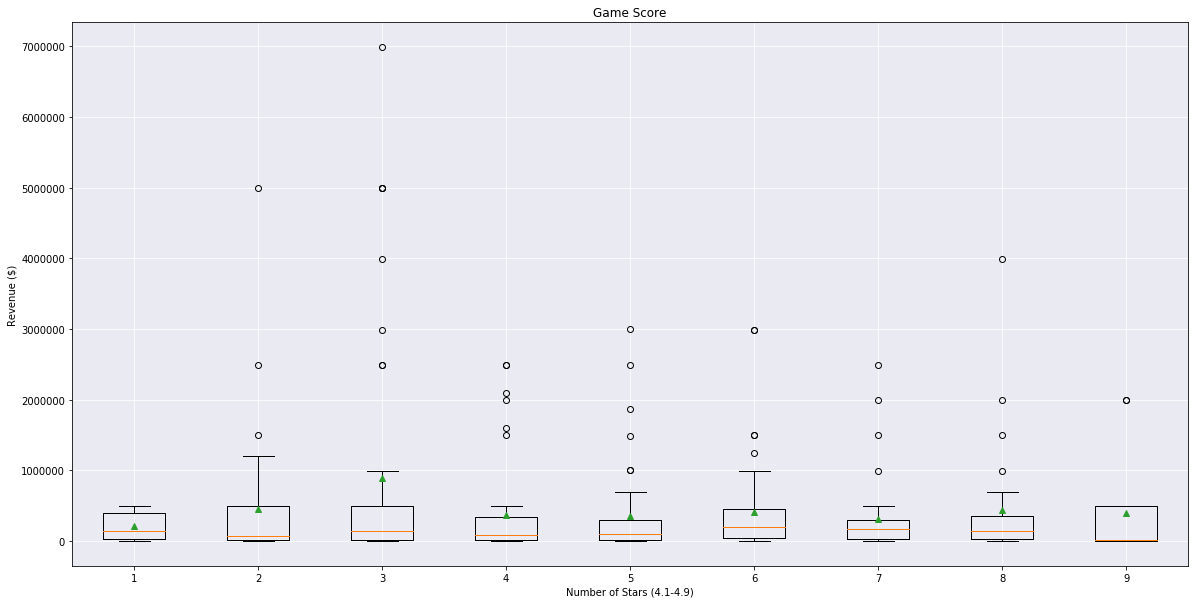

In [39]:
plt.figure(figsize=(20,10))
plt.rcParams['axes.facecolor'] = '#eaeaf2'
plt.boxplot(data_by_star, showmeans=True)
plt.title('Game Score')
plt.xlabel('Number of Stars (4.1-4.9)')
plt.ylabel('Revenue ($)')
plt.savefig('revenueboxplot.png')
plt.grid(color='w')
plt.show()